### The Titanic dataset provides information on the fate of the passengers on the Titanic, summarized according to economic status, sex, age, and survival. 
- Our task is to predict the survival of the Titanic passengers.

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

import seaborn as sns
sns.set(style='white', color_codes=True)
sns.set(font_scale=1.5)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics

In [2]:
df_train = pd.read_csv('train.csv')
df_train.shape

(891, 12)

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [5]:
df_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [6]:
df_train.Embarked.value_counts() # city ports passengers embarked from (Southhampton, Cherbourg, Queens town)

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [7]:
# check for missing values
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# cabin has almost 80% missing values; drop variables that do not provide meaningful insights to prediction
df_train = df_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Fare'], axis=1)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [9]:
# deal with missing values in Age variable
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [10]:
df_train.groupby(['Pclass']).mean()

,Survived,Age,SibSp,Parch
Pclass,,,,
1,0.629630,38.233441,0.416667,0.356481
2,0.472826,29.877630,0.402174,0.380435
3,0.242363,25.140620,0.615071,0.393075


In [11]:
df_train['Age'] = df_train[['Age', 'Pclass']].apply(age_approx, axis=1)

In [12]:
# veify is null variables are present after transformation
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    2
dtype: int64

In [13]:
# drop the two null records on Embarked
df_train.dropna(inplace=True)
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [14]:
# column data types
df_train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Embarked     object
dtype: object

In [15]:
# convert Sex and Embarked to categorical
df_train_dummied = pd.get_dummies(df_train, columns=['Sex', 'Embarked'])

In [16]:
df_train_dummied.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,0,1,0,0,1
1,1,1,38.0,1,0,1,0,1,0,0
2,1,3,26.0,0,0,1,0,0,0,1
3,1,1,35.0,1,0,1,0,0,0,1
4,0,3,35.0,0,0,0,1,0,0,1


<AxesSubplot:>

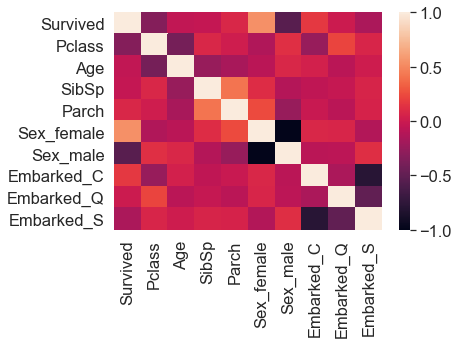

In [17]:
# find out if variables are correlated
plt.figure(figsize=(6,4))
sns.heatmap(df_train_dummied.corr())

There is a strong correlation between Survived and Sex_female variables.

In [20]:
used_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
X = df_train_dummied[used_features].values
y = df_train_dummied['Survived']

In [21]:
# create train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [22]:
# check shape of train and test datasets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(622, 9)
(267, 9)
(622,)
(267,)


In [23]:
LogReg = LogisticRegression()

In [26]:
# fit training data
LogReg.fit(X_train, y_train)

# pred on test data
pred = LogReg.predict(X_test)

# confusion matrix
conf_matrix = confusion_matrix(y_test, pred)
print(conf_matrix)

# classification report
print(classification_report(y_test, pred))

[[143  23]
 [ 22  79]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       166
           1       0.77      0.78      0.78       101

    accuracy                           0.83       267
   macro avg       0.82      0.82      0.82       267
weighted avg       0.83      0.83      0.83       267



/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
LogReg.predict_proba(X_test)

array([[0.26620494, 0.73379506],
       [0.39786609, 0.60213391],
       [0.94764218, 0.05235782],
       [0.25830925, 0.74169075],
       [0.94363767, 0.05636233],
       [0.13527111, 0.86472889],
       [0.33342571, 0.66657429],
       [0.517467  , 0.482533  ],
       [0.78020431, 0.21979569],
       [0.40803149, 0.59196851],
       [0.74098184, 0.25901816],
       [0.21067256, 0.78932744],
       [0.74871395, 0.25128605],
       [0.14493814, 0.85506186],
       [0.86457882, 0.13542118],
       [0.36995257, 0.63004743],
       [0.89369259, 0.10630741],
       [0.29866731, 0.70133269],
       [0.17717813, 0.82282187],
       [0.3974597 , 0.6025403 ],
       [0.90504923, 0.09495077],
       [0.55243537, 0.44756463],
       [0.86463292, 0.13536708],
       [0.93689125, 0.06310875],
       [0.51594489, 0.48405511],
       [0.51717993, 0.48282007],
       [0.03900859, 0.96099141],
       [0.86920304, 0.13079696],
       [0.898032  , 0.101968  ],
       [0.32428417, 0.67571583],
       [0.